<table style="width:100%" border="0">
    <col width="20%">
    <col width="60%">
    <col width="20%">
    <tr></tr>
    <tr>
        <th style="text-align:left"><img src="Images/UNAM_logo.jpg" width="150px"></th>
        <th style="text-align:center"><span style="font-size:220%">Física Computacional</span><br/><br/><span style="font-size:150%">Tarea 12</span></th> 
        <th style="text-align:right"><img src="Images/LogoCiencias.jpg" width="170px"></th>
    </tr>
</table>

In [1]:
using PyPlot;

## Ejercicio 1

El método implícito de Euler es similar al método de Euler convencional, solamente que este es más estable para ciertas ecuaciones diferenciales.

La fórmula de recurrencia es:

$$x_{k+1}=x_{k}+hf(x_{k+1},t_{k+1}),$$

en donde $x_{k}=x(t_{k})$ y $t_{k+1}=t_{k}+h$. Se implementará el método de Euler en utilizando el método de Newton para hallar la aproximación $x_{k+1}$ de la fórmula de recurrencia. También se implementará utilizando el método del punto fijo.

Para el método que utilizará el método de Newton, este último hará uso de un método numérico para aproximar la derivada que requiere el método de Newton, se utilizará la derivada numérica simétrica.

In [8]:
function derivada_simetrica(f,x0,h)
    
    D = (f(x0+h)-f(x0-h))./(2*h)    # Lista con las aproximaciones a la derivada.
    
    return D                        # La salida es el vector D que tiene las aproximaciones
    
end;

In [9]:
function newton(g,x0,h)
    
    dg(z) = derivada_simetrica(g,z,h)  # Aproximación de la derivada.
    x = x0;                            # Condición inicial dada por el usuario.
    
    for i in 1:10
        x = x-g(x)/dg(x)               # Nueva aproximación de la raíz dada por el método de Newton.
    end
    
    return x                           # La salida de la función es la aproximación a la raíz de f.
    
end;

Y el método de Euler implícito que utiliza el método del punto fijo, utiliza la rutina siguiente:

In [10]:
function fijo(f,x0)
    
    x = x0         # Condición inicial.
    for i in 1:20
        x = f(x)   # Iteraciones para aproximar el punto fijo.
    end
    
    return x       # Regresa una aproximación del punto fijo.
    
end;

Así pues el método implicito de Euler queda:

In [11]:
function euler_implicito(f,x0,listt,metodo)
    
    n = length(listt)                    # Número de elementos de la lista listt.
    listx = zeros(n)                     # Se guarda en la memoria la lista listx.
    listx[1] = x0                        # El primer elemento de listx es la condición inicial x0.
    h = listt[2]-listt[1]                # El paso entre elementos de la lista listt.
    for k in 1:n-1
        xk = listx[k]                    # xk representa el k-ésimo elemento de listx.
        t = listt[k+1]                   # t representa la (k+1)-ésimo elemento de listt.
        if metodo == "newton"
            g(z) = z - xk - h*f(z,t)     # g es la función a la que deseamos encontrar su raíz x_(k+1).
            listx[k+1] = newton(g,xk,h)  # Método de Newton con g agregando a listx la aproximación x_(k+1).
        elseif metodo == "fijo"
            G(z) = xk + h*f(z,t)
            listx[k+1] = fijo(G,xk)     # Método de punto fijo con g agregando a listx la aproximación x_(k+1).
        else
            return print("El método debe de ser \x1b[1mnewton\x1b[0m o \x1b[1mfijo\x1b[0m, no está definido para \x1b[1m$metodo\x1b[0m")
        end
    end
    
    return listx                         # El resultado es listx.
    
end;

Observemos que si la última entrada de `euler_implicito` se da un método que no sea el de Newton (newton) o punto fijo (fijo), nos de un aviso:

In [6]:
f(x)=x;
listt=0:1:2;
euler_implicito(f,1,listt,"otro")

El método debe de ser newton o fijo, no está definido para otro

Esto pues no es necesario.

## Ejercicio 2

La regla del punto medio es una modificación del método de Euler, cuya fórmula de recurrencia es:

$$x_{k+1}=x_{k}+hf\left(\tilde{x}_{k+\frac{1}{2}},t_{k+\frac{1}{2}}\right),$$

en donde $\displaystyle t_{k+\frac{1}{2}}=t_{k}+\frac{h}{2}$. Mientras que $\displaystyle\tilde{x}_{k+\frac{1}{2}}=x_{k}+\frac{h}{2}f(x_{k},t_{k})$.

In [7]:
function midpoint(f,x0,listt)
    
    n = length(listt)                               # Número de elementos de la lista listt.
    listx = zeros(n)                                # Se guarda en la memoria la lista listx.
    listx[1] = x0                                   # El primer elemento de listx es la condición inicial x0.
    l = (listt[2]-listt[1])/2.0                     # l es la mitad del paso h.
    for k in 1:n-1
        x = listx[k] + l*f(listx[k],listt[k])       # Esta es la aproximación de x_{k+1/2}.
        listx[k+1] = listx[k] + 2l*f(x,listt[k]+l)  # Aproximación de x_{k+1}
    end
    
    return listx
    
end;

## Ejercicio 3

El método de Runge-Kutta es uno de los más conocidos para resolver ecuaciones diferenciales de manera numérica. El más usado es el métodod de Runge-Kutta de orden 4 (RK4), el cual está dado por:

$$x_{n+1}=x_{n}+\frac{h}{6}\left(k_{1}+2k_{2}+2k_{3}+k_{4}\right)$$

en donde

$$
\left\{\begin{array}{rcl}
k_{1} & = & f\left(x_{n},t_{n}\right)\\
k_{2} & = & f\left(x_{n}+\frac{h}{2}k_{1},t_{n}+\frac{h}{2}\right)\\
k_{3} & = & f\left(x_{n}+\frac{h}{2}k_{2},t_{n}+\frac{h}{2}\right)\\
k_{4} & = & f\left(x_{n}+hk_{3},t_{n}+h\right)
\end{array}\right..
$$

In [8]:
function RK4(f,x0,listt)
    
    n = length(listt)                                  # Número de elementos de la lista listt.
    listx = zeros(n)                                   # Se guarda en la memoria la lista listx.
    listx[1] = x0                                      # El primer elemento de listx es la condición inicial x0.
    l = (listt[2]-listt[1])/2.0                        # l es la mitad del paso h.
    for i in 1:n-1
        k1 = f(listx[i],listt[i])
        k2 = f(listx[i]+l*k1,listt[i]+l)
        k3 = f(listx[i]+l*k2,listt[i]+l)
        k4 = f(listx[i]+2l*k3,listt[i]+2l)
        listx[i+1] = listx[i]+(l/3.0)*(k1+2k2+2k3+k4)  # Método de Runge-Kutta de orden 4
    end
    
    return listx
    
end;

## Ejercicio 4

En la tarea 11 se resolvio la ecuación diferencial:

$$\frac{dx}{dt}=-2.5x, \: x_{0}=x(0)=1\text{ y }2, \text{ y } t\in(0,8),$$

para los pasos $h=1.0,0.5,0.2,0.01$. Cuya solución analítica es:

$$x(t)=x_{0}e^{-2.5t}.$$

Ahora se usará el método de Euler implícito para aproximar la ecuación diferencial.

In [5]:
f(x,t)=-2.5x;

In [10]:
listt1=0:1:8;                              # Discretización del intervalo [0,8] con paso 1.
S11=euler_implicito(f,1,listt1,"newton");  # Condición inicial x0=1.

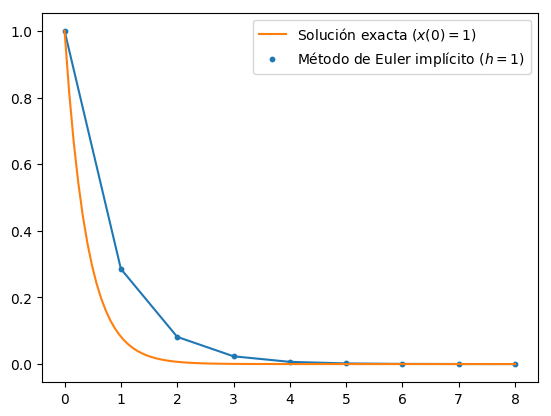

In [11]:
scatter(listt1,S11,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(listt1,S11)
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

In [12]:
listt2=0:0.5:8;                            # Discretización del intervalo [0,8] con paso 0.5.
listt3=0:0.2:8;                            # Discretización del intervalo [0,8] con paso 0.2.
listt4=0:0.01:8;                           # Discretización del intervalo [0,8] con paso 0.01.
S12=euler_implicito(f,1,listt2,"newton");
S13=euler_implicito(f,1,listt3,"newton");
S14=euler_implicito(f,1,listt4,"newton");

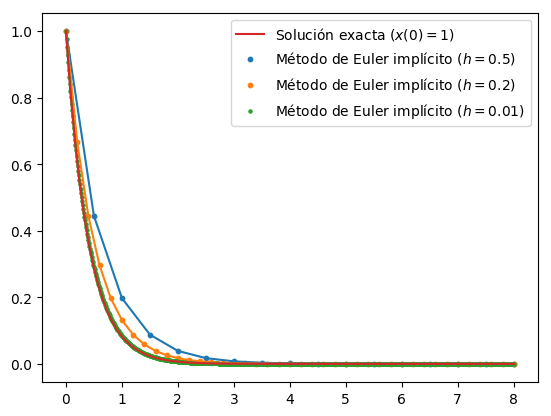

In [13]:
scatter(listt2,S12,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(listt2,S12)
scatter(listt3,S13,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(listt3,S13)
scatter(listt4,S14,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(listt4,S14)
t=linspace(0,8,100)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

Observemos la diferencia con los resultados del método de Euler ordinario, para ello se tienen las siguientes imágenes que muestran las gráficas para las $h$'s correspondientes:

<img src="Images/E1.png">
<img src="Images/E2.png">

Es evidente la mejora para $h=1$: mientras que con el método de Euler no se da la convergencia a la solución, con el método implícito si se da la convergencia. Para $h=0.5$ el método de Euler ya converge, pero presenta un punto muy lejos de la solución (gráfica derecha de la imagen de arriba), mientras que en el método implícito ya no hay tales _brincos_. Para las demás $h$ ambos métodos convergen. Se observa además que el método de Euler hace que las aproximaciones sean menores al la solución, mientras que el método implícito hace que las aproximaciones sean mayores a la solución, lo cual no es ninguna sorpresa ya que ambos se derivan de la integración numérica del rectángulo siendo diferentes en que punto del rectángulo se evalua la función $f$.

Y con la condición inicial $x(0)=2$.

In [13]:
listt_1=0:1:8;                              # Discretización del intervalo [0,8] con paso 1.
S21=euler_implicito(f,2,listt1,"newton");  # Condición inicial x0=2.

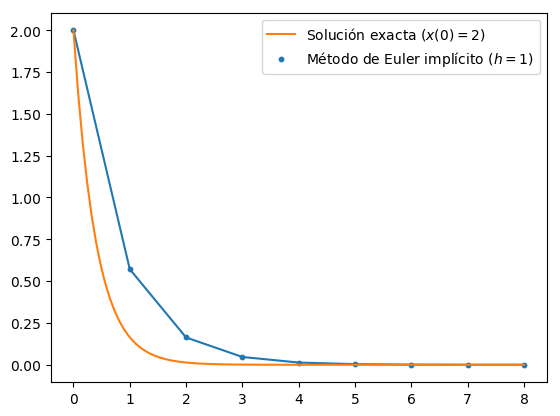

In [15]:
scatter(listt_1,S21,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(listt_1,S21)
t=linspace(0,8,100)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
legend()
show();

In [17]:
listt_2=0:0.5:8;                            # Discretización del intervalo [0,8] con paso 0.5.
listt_3=0:0.2:8;                            # Discretización del intervalo [0,8] con paso 0.2.
listt_4=0:0.01:8;                           # Discretización del intervalo [0,8] con paso 0.01.
S22=euler_implicito(f,2,listt_2,"newton");
S23=euler_implicito(f,2,listt_3,"newton");
S24=euler_implicito(f,2,listt_4,"newton");

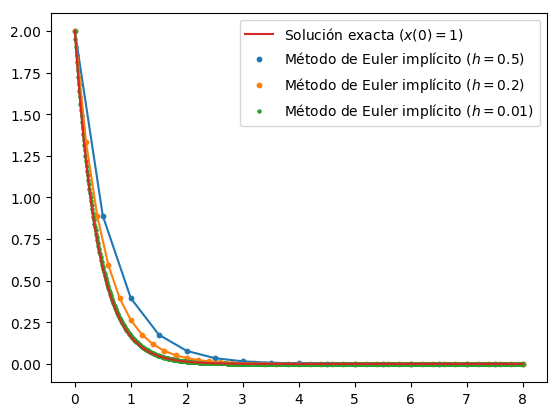

In [18]:
scatter(listt_2,S22,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(listt_2,S22)
scatter(listt_3,S23,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(listt_3,S23)
scatter(listt_4,S24,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(listt_4,S24)
t=linspace(0,8,100)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
legend()
show();

## Ejercicio 5

En la tarea 11 también se resolvió:

$$\frac{dx}{dt}=\frac{2x-18 t}{1+t},$$

con la condición inicial $x(0)=4$, cuya solución es $x(t)=-5t^{2}+8t+4$. Ahora lo haremos con el metodo del punto medio y el RK4.

In [14]:
f(x,t)=(2x-18t)/(1+t);

In [15]:
listm1=0:0.5:3;           # Discretización del intervalo [0,3] con paso 0.5.
listm2=0:0.2:3;           # Discretización del intervalo [0,3] con paso 0.2.
M1=midpoint(f,4,listm1);
M2=midpoint(f,4,listm2);

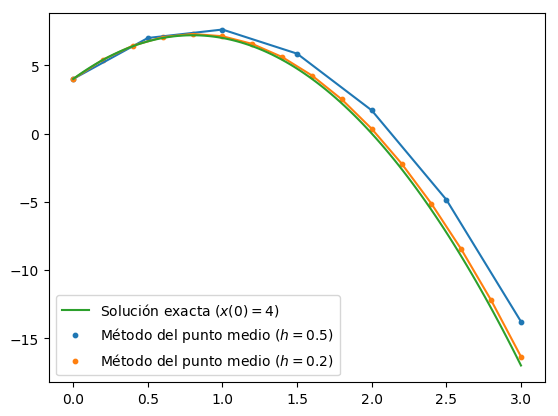

In [16]:
scatter(listm1,M1,label=L"Método del punto medio ($h=0.5$)",s=10)
plot(listm1,M1)
scatter(listm2,M2,label=L"Método del punto medio ($h=0.2$)",s=10)
plot(listm2,M2)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

Sin duda el método del punto medio tiene una mejoría respecto al método de Euler, en el método del punto medio un paso de $h=0.5$ da una mejor aproximación que con el método de Euler con un paso de $h=0.2$.

In [17]:
listr1=0:1:3;        # Discretización del intervalo [0,3] con paso 1.
listr2=0:0.5:3;      # Discretización del intervalo [0,3] con paso 0.5.
R1=RK4(f,4,listr1);
R2=RK4(f,4,listr2);

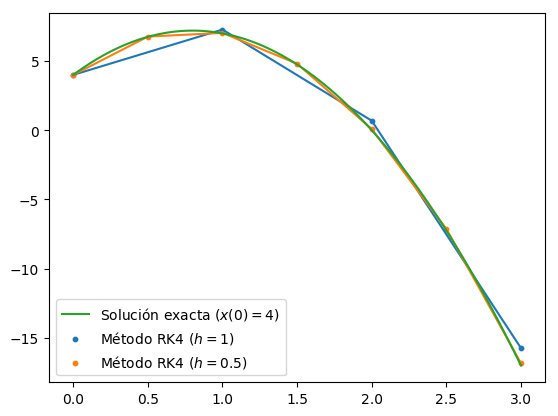

In [18]:
scatter(listr1,R1,label=L"Método RK4 ($h=1$)",s=10)
plot(listr1,R1)
scatter(listr2,R2,label=L"Método RK4 ($h=0.5$)",s=10)
plot(listr2,R2)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

Este método es todavía mejor, pues en éste con un ¡paso $h=1$! se tiene que los puntos que aproximan a la curva solución son muy cercanos a ésta, para $h=0.5$ la mejora es mucho mejor. Veamos como se comporta para $h=0.2$:

In [19]:
listr3=0:0.2:3;      # Discretización del intervalo [0,3] con paso 0.2.
R3=RK4(f,4,listr3);

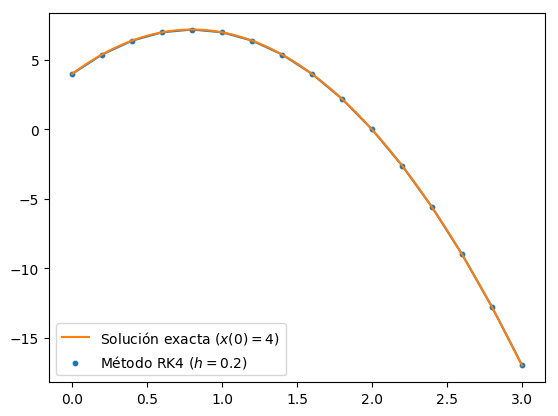

In [20]:
scatter(listr3,R3,label=L"Método RK4 ($h=0.2$)",s=10)
plot(listr3,R3)
t=linspace(0,3,100)
plot(t,-5t.^2+8t+4,label=L"Solución exacta ($x(0)=4$)")
legend()
show();

## Ejercicio 6

Ahora encontraremos la energía total de un oscilador armónico, para ello debemos de resolver la ecuación diferencial:

$$\ddot{x}=-kx,\:k>0$$

Lo haremos para una masa $m=1\:\mathrm{kg}$, $k=4\:\mathrm{N/m}$, $x(0)=3\:\mathrm{m}$ y $\dot{x}(0)=5\:\mathrm{m/s}$, en el intervalo $(0,2\pi)$.

In [21]:
function euler(f,listt,x0)
     x = x0
     h = listt[2]-listt[1]
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        x = x + f(x,t)*h
        push!(listx,x) 
     end
     return listx
end;

La función anterior (`euler`) y la siguiente (`RK_4`) son el método de Euler y el método RK4 que no dependen de la dimensión.

In [22]:
function RK_4(f,listt,x0)
     x = x0
     l = (listt[2]-listt[1])/2.0
     listx=[]
     push!(listx,x)
     for i in 2:length(listt)
        t = listt[i]
        k1 = f(x,t)
        k2 = f(x+l*k1,t+l)
        k3 = f(x+l*k2,t+l)
        k4 = f(x+2l*k3,t+2l)
        x += (l/3.0)*(k1+2k2+2k3+k4)
        push!(listx,x) 
     end
     return listx
end;

La solución exacta es $x(t)=3\cos(2t)+\displaystyle\frac{5}{2}\:\mathrm{sen}(2t)$, $\dot{x}(t)=-6\:\mathrm{sen}(2t)+5\cos(2t)$:

In [23]:
solutionx(t)=3*cos(2t)+(5/2)*sin(2t);
solutionv(t)=-6*sin(2t)+5*cos(2t);

Sabemos que si tomamos $u(t)=\dot{x}(t)$, entonces:

$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx, & u_{0}=\dot{x}(0)
\end{array}\right.$$

Es decir $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$. En nuestro caso $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))=$ `(x[2],-kx[1])`, es decir $\mathbf{x}(t)=$ `(x[1],x[2])`

In [24]:
f(x,t)=[x[2],-4*x[1]];  # k=4.

In [25]:
listtE=0:0.1:20;             # Paso h=0.1
vecE=euler(f,listtE,[3,5]);

In [26]:
listxE1=map(x->x[1],vecE);
listxE2=map(x->x[2],vecE);

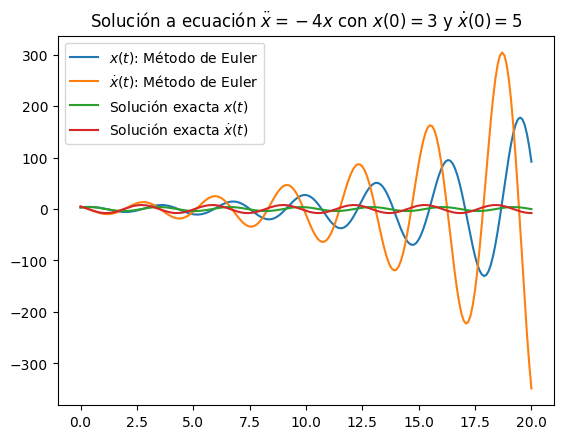

In [27]:
plot(listtE,listxE1,label=L"$x(t)$: Método de Euler")
plot(listtE,listxE2,label=L"$\dot{x}(t)$: Método de Euler");
t=linspace(0,20,200)
plot(t,solutionx.(t),label=L"Solución exacta $x(t)$")
plot(t,solutionv.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

In [28]:
listtRK=0:0.1:20;             # Paso h=0.1
vecRK=RK_4(f,listtRK,[3,5]);

In [29]:
listxRK1=map(x->x[1],vecRK);
listxRK2=map(x->x[2],vecRK);

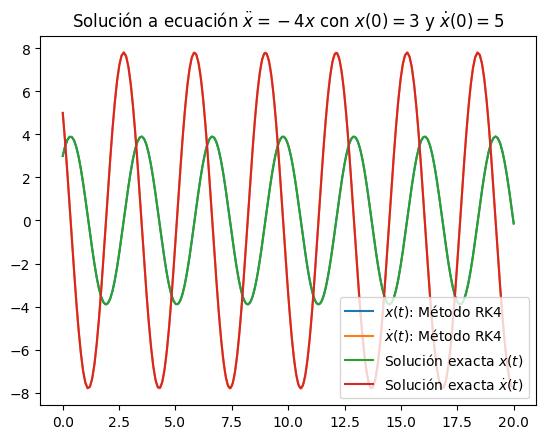

In [30]:
plot(listtRK,listxRK1,label=L"$x(t)$: Método RK4")
plot(listtRK,listxRK2,label=L"$\dot{x}(t)$: Método RK4");
t=linspace(0,20,200)
plot(t,solutionx.(t),label=L"Solución exacta $x(t)$")
plot(t,solutionv.(t),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-4x$ con $x(0)=3$ y $\dot{x}(0)=5$")
legend()
show();

La energía total en el oscilador armónico es:

$$E=\frac{1}{2}m\dot{x}^{2}(t)+\frac{1}{2}kx^{2}(t),$$

entonces, para nuestro caso con $m=1\:\mathrm{kg}$ y $k=4\:\mathrm{N/m}$ $E=\displaystyle\frac{61}{2}\:\mathrm{J}$.

* Con el método de Euler:

In [31]:
Energia(t)=61/2;

In [32]:
EnergiaE=0.5*(listxE2.^2+4*listxE1.^2);

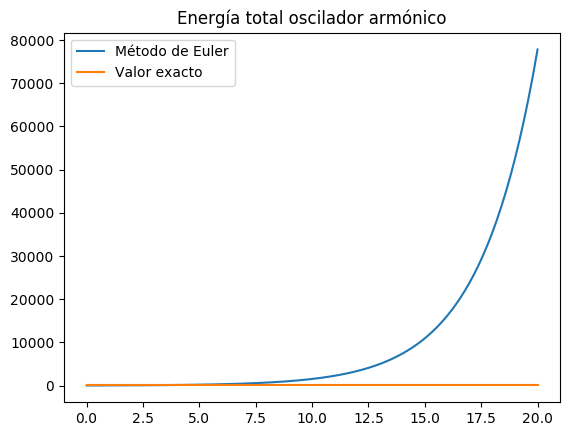

In [33]:
plot(listtE,EnergiaE,label="Método de Euler")
t=linspace(0,20,10)
plot(t,Energia.(t),label="Valor exacto")
title("Energía total oscilador armónico")
legend()
show();

In [34]:
EnergiaRK=0.5*(listxRK2.^2+4*listxRK1.^2);

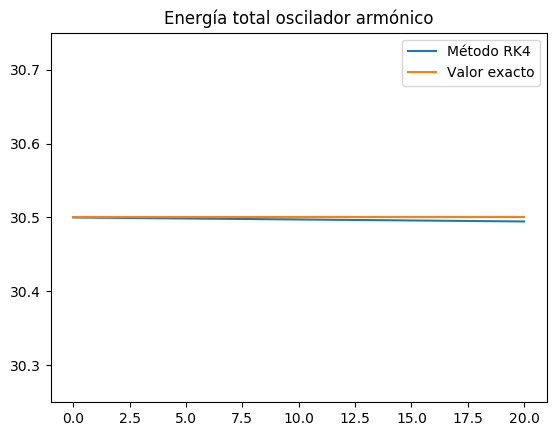

In [35]:
plot(listtRK,EnergiaRK,label="Método RK4")
t=linspace(0,20,10)
plot(t,Energia.(t),label="Valor exacto")
title("Energía total oscilador armónico")
ylim(30.25,30.75)
legend()
show();

Es evidente como el método explicito de Euler no converge a la solución para $h=0.1$ tan bien como el RK4, la gráfica para la energía total con el método de Euler tien un rango en las ordenadas de 0 a 80000, mientras que para la gráfica que usa el RK4 el rango de ordenadas es de 30.25 a 30.75. La diferencia es notable.

## Ejercicio 7

Ahora se gráfica la trayectoria $(x(t),v(t))=(x(t),\dot{x}(t))$, que da una idea del espacio fase en mecánica clásica. Se hace con el método de Euler y el método RK4 para $h=0.01$.

Para el método de Euler se ajusta para el paso $h=0.01$.

In [36]:
listtEE=0:0.01:20;             # Paso h=0.01
vecEE=euler(f,listtEE,[3,5]);
listxEE1=map(x->x[1],vecEE);
listxEE2=map(x->x[2],vecEE);

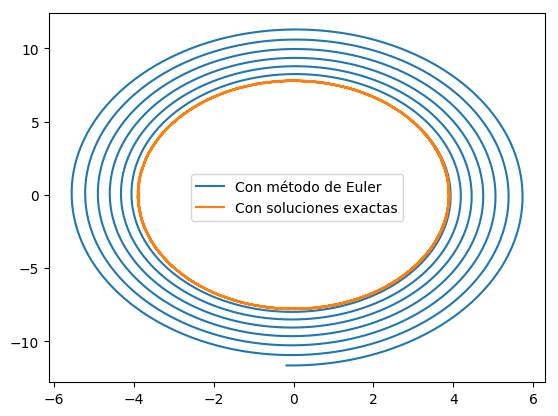

In [37]:
plot(listxEE1,listxEE2,label="Con método de Euler");
t = linspace(0,20,200)
plot(solutionx.(t),solutionv.(t),label="Con soluciones exactas");
legend()
show();

Para el método RK4 se ajusta para el paso $h=0.01$.

In [38]:
listtRK4=0:0.01:20;             # Paso h=0.01
vecRK4=RK_4(f,listtRK4,[3,5]);
listxRK41=map(x->x[1],vecRK4);
listxRK42=map(x->x[2],vecRK4);

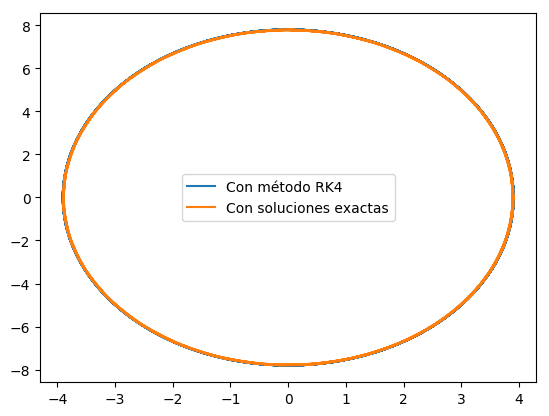

In [39]:
plot(listxRK41,listxRK42,label="Con método RK4");
t = linspace(0,20,200)
plot(solutionx.(t),solutionv.(t),label="Con soluciones exactas");
legend()
show();

Nuevamente se observa como el método de Euler no converge describiendo una trayectoria no cerrada que se va "abriendo" más, mientras que el método RK4 describe muy bien la trayectoria.

## Ejercicio 8

Se grafican las soluciones al oscilador armónico para $k=4$ con varias condiones iniciales en el espacio fase.

In [40]:
f(x,t)=[x[2],-4*x[1]];  # k=4.

In [41]:
listt_RK4=0:0.01:pi;                               # Paso h=0.01
listx_RK111=map(x->x[1],RK_4(f,listt_RK4,[1,1]));  # Solución x(t) para x(0)=1 y v(0)=1
listx_RK112=map(x->x[2],RK_4(f,listt_RK4,[1,1]));  # Solución v(t) para x(0)=1 y v(0)=1
listx_RK281=map(x->x[1],RK_4(f,listt_RK4,[2,8]));  # Solución x(t) para x(0)=2 y v(0)=8
listx_RK282=map(x->x[2],RK_4(f,listt_RK4,[2,8]));  # Solución v(t) para x(0)=2 y v(0)=8
listx_RK931=map(x->x[1],RK_4(f,listt_RK4,[9,3]));  # Solución x(t) para x(0)=9 y v(0)=3
listx_RK932=map(x->x[2],RK_4(f,listt_RK4,[9,3]));  # Solución v(t) para x(0)=9 y v(0)=3
listx_RK571=map(x->x[1],RK_4(f,listt_RK4,[5,7]));  # Solución x(t) para x(0)=5 y v(0)=7
listx_RK572=map(x->x[2],RK_4(f,listt_RK4,[5,7]));  # Solución v(t) para x(0)=5 y v(0)=7

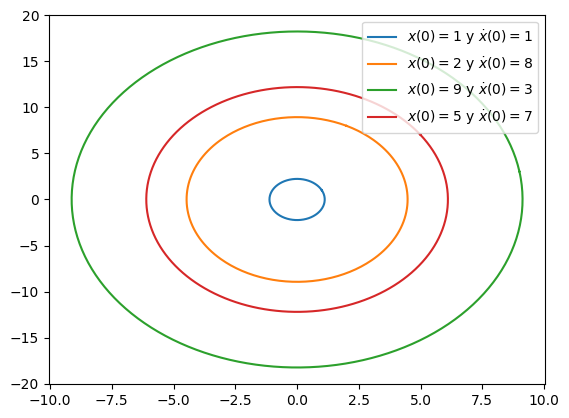

In [42]:
plot(listx_RK111,listx_RK112,label=L"$x(0)=1$ y $\dot{x}(0)=1$");
plot(listx_RK281,listx_RK282,label=L"$x(0)=2$ y $\dot{x}(0)=8$");
plot(listx_RK931,listx_RK932,label=L"$x(0)=9$ y $\dot{x}(0)=3$");
plot(listx_RK571,listx_RK572,label=L"$x(0)=5$ y $\dot{x}(0)=7$");
legend()
show();

Sin embargo se observa que realizar estas gráficas manualmente es tardado, sobre todo por el nombre que se le tiene que estar dando a las listas, por ello se implementa una función que pueda recibir la lista de condiciones iniciales de la variable $\mathbf{x}_{0}=\mathbf{x}(0)$ y su derivada $\mathbf{\dot{x}}_{0}=\mathbf{\dot{x}}(0)$, además de cualquier $k$ y que grafique automáticamente.

In [43]:
function oscilador_armonico(k,x0,u0)
    
    if length(x0) == length(u0)
        f(x,t)=[x[2],-k*x[1]];                                 # Función a resolver (oscilador armónico).
        listt = 0:0.01:2pi/sqrt(k);                            # El rango de tiempos t.
        listx1 = []                                            # Lista donde se guardará la variable x(t).
        listx2 = []                                            # Lista donde se guardará la derivada v(t).
        for n in 1:length(x0)
            i=x0[n]                                            # i es x_{n}(0).
            j=u0[n]                                            # j es v_{n}(0).
            push!(listx1,map(x->x[1],RK_4(f,listt,[i,j])))     # Se van almacenando las x(t).
            push!(listx2,map(x->x[2],RK_4(f,listt,[i,j])))     # Se van almacenando las v(t).
            plot(listx1[n],listx2[n],label=latexstring("\$x(0)=$i\$ y \$\\dot{x}(0)=$j\$"))  # Se grafica v(t) vs x(t).
        end
        legend(bbox_to_anchor=[1.05,1],loc=2,borderaxespad=0)  # Leyenda de la gráfica, lo de adentro es para que
        show();                                                # aparezca fuera de la región del gráfico.
    else
        return print("Faltan condiciones iniciales")
    end
    
end;

Entonces la función `oscilador_armonico` recibe como primer argumento la constante $k$, el segundo argumento es el vector que tiene las condiciones iniciales de la variable $\mathbf{x}(0)=(x_{1}(0),x_{2}(0),\dots,x_{n}(0))$ y el tercer argumento las condiciones iniciales de la derivada $\mathbf{\dot{x}}(0)=(\dot{x}_{1}(0),\dot{x}_{2}(0),\dots,\dot{x}_{n}(0))$. Observe que es necesario que ambos vectores $\mathbf{x}(0)$ y $\mathbf{\dot{x}}(0)$ tienen que tener el mismo número de componentes, de lo contrario faltan (o sobran) condiciones iniciales, la función anterior solamente advierte que faltan de condiciones iniciales en caso de ser vectores con diferente número de componentes.

Así la gráfica anterior resulta simplemente de ejecutar como sigue: 

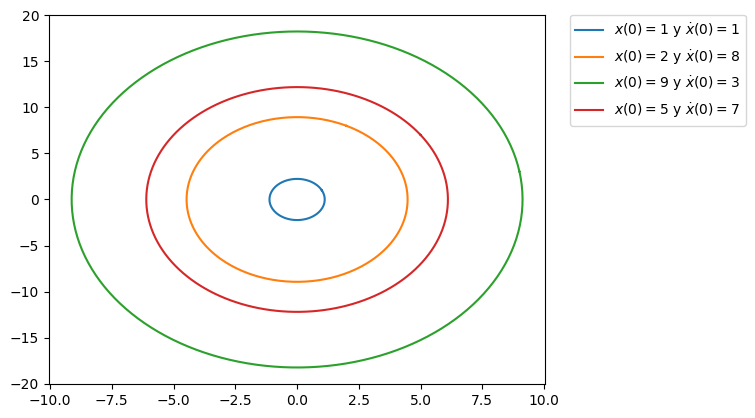

In [44]:
oscilador_armonico(4,[1,2,9,5],[1,8,3,7])

Pero podemos colocar muchas más sin tanto trabajo:

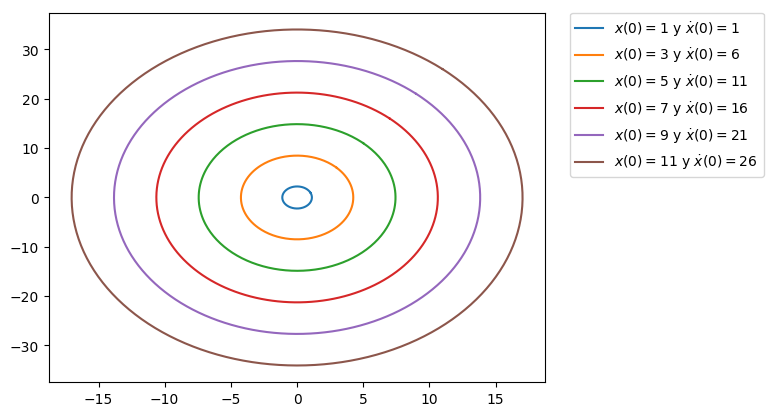

In [45]:
oscilador_armonico(4,1:2:11,1:5:26)

O todavía más:

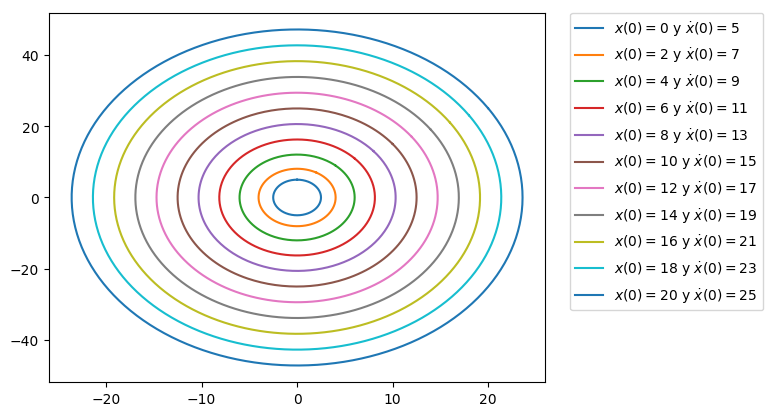

In [46]:
oscilador_armonico(4,0:2:20,5:2:25)

<div align="right" style="text-indent:0.5cm">**Alonso Torres Edgar Giovanni**</div>